# P2: Investifando uma Base de Dados

## Pedro Barbosa de Oliveira Filho

### Base de Dados:  *Tripulantes a bordo do Titanic (https://www.kaggle.com/c/titanic/data)*

#### *Brainstorm* - Quais os fatores que mais influenciaram a sobrevivência das pessoas a bordo do Titanic?

1. Passageiros de classe sócio-econômica (*Pclass*) mais elevada tiveram maior taxa de sobrevivência?
2. Passageiros com prioridade em situações de emergência (mulheres e crianças) tieram maior taxa de sobrevivência?
3. Passageiros que embarcaram em diferentes portos apresentaram diferentes taxas de sobrevivência?

### Análise Exploratória dos Dados

Carregando bibliotecas necessárias.

In [1]:
# Carregando a biblioteca NumPy
import numpy as np

# Carregando a biblioteca Pandas
import pandas as pd

# Carregando a biblioteca matplotlib.pyplot
import matplotlib.pyplot as plt

# Carregndo a biblioteca seaborn
%pylab inline
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


Carregando dados dos passageiros e tripulantes a bordo do Titanic.

In [2]:
titanic_data = pd.read_csv("titanic_data.csv")

Visualizando as primeiras linhas do dataframe.

In [3]:
titanic_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Para facilitar a visualização dos dados, a variável numérica *Survived* (1 = sim, 0 = não) foi alterada para categórica conforme código abaixo.

In [4]:
titanic_data["Survived"] = titanic_data["Survived"].replace([1, 0], ["Survived", "Dead"])
titanic_data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,Dead,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,Survived,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,Survived,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


Número total de passageiros.

In [5]:
titanic_data["PassengerId"].count()

891

Distribuição entre número de passageiros sobreviventes e mortos.

In [6]:
titanic_data["Survived"].value_counts()

Dead        549
Survived    342
Name: Survived, dtype: int64

#### 1. Relação entre classe sócio-econômica (*Pclass*) e sobrevivência (*Survived*)

Distribuição de passageiros por classe sócio-econômica.

In [7]:
titanic_data["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

Distribuição de passageiros sobreviventes e mortos por classe sócio-econômica.

In [8]:
pclass_surv_tab = pd.crosstab(titanic_data["Survived"],titanic_data["Pclass"])
pclass_surv_tab

Pclass,1,2,3
Survived,,,
Dead,80,97,372
Survived,136,87,119


Gráfico de barras empilhadas: Distribuição por classe sócio-econômica de passageiros sobreviventes e mortos.

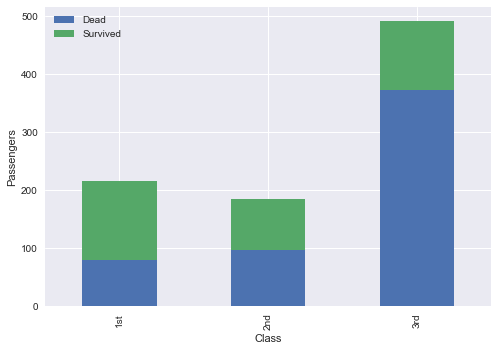

In [9]:
Pclass1 = titanic_data[titanic_data["Pclass"]==1]["Survived"].value_counts()
Pclass2 = titanic_data[titanic_data["Pclass"]==2]["Survived"].value_counts()
Pclass3 = titanic_data[titanic_data["Pclass"]==3]["Survived"].value_counts()
df = pd.DataFrame([Pclass1,Pclass2,Pclass3])
df.index = ["1st","2nd","3rd"]
df.plot(kind="bar",stacked=True)
plt.xlabel("Class")
plt.ylabel("Passengers")
plt.show()

Taxa de sobrevivência por classe sócio-econômica.

In [10]:
Pclass1_surv_rate = round(float(Pclass1["Survived"]) / float(Pclass1.sum()), 4)
Pclass2_surv_rate = round(float(Pclass2["Survived"]) / float(Pclass2.sum()), 4)
Pclass3_surv_rate = round(float(Pclass3["Survived"]) / float(Pclass3.sum()), 4)

pclass_surv_rate_df = pd.DataFrame([Pclass1_surv_rate,Pclass2_surv_rate,Pclass3_surv_rate])
pclass_surv_rate_df.index = df.index = ["1st","2nd","3rd"]
pclass_surv_rate_df.columns = ["Survival Rate"]

pclass_surv_rate_df

,Survival Rate
1st,0.6296
2nd,0.4728
3rd,0.2424


Analisando o gráfico e a tabela acima acima percebe-se que passageiros de classe sócio-econômica mais baixa (*3rd < 2nd < 1st*) apresntaram menores taxas de sobrevivência.

#### 2. Relação entre gênero (*Sex*) e sobrevivência (*Survived*)

Distribuição de passageiros por gênero.

In [11]:
titanic_data["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

Distribuição de passageiros sobreviventes e mortos por gênero.

In [12]:
sex_surv_tab = pd.crosstab(titanic_data["Survived"],titanic_data["Sex"])
sex_surv_tab

Sex,female,male
Survived,,
Dead,81,468
Survived,233,109


Gráfico de barras empilhadas: Distribuição por gênero de passageiros sobreviventes e mortos.

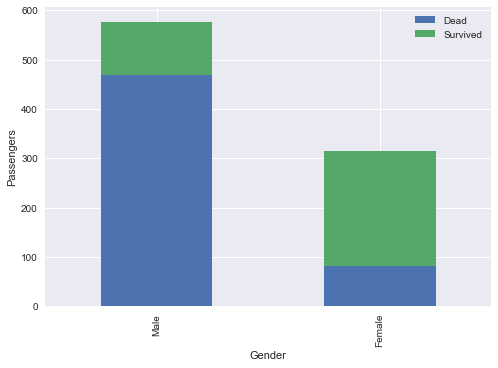

In [13]:
Male = titanic_data[titanic_data["Sex"]=="male"]["Survived"].value_counts()
Female = titanic_data[titanic_data["Sex"]=="female"]["Survived"].value_counts()
df = pd.DataFrame([Male,Female])
df.index = ["Male","Female"]
df.plot(kind="bar",stacked=True)
plt.xlabel("Gender")
plt.ylabel("Passengers")
plt.show()

Taxa de sobrevivência por gênero.

In [14]:
Male_surv_rate = round(float(Male["Survived"]) / float(Male.sum()), 4)
Female_surv_rate = round(float(Female["Survived"]) / float(Female.sum()), 4)

sex_surv_rate_df = pd.DataFrame([Male_surv_rate,Female_surv_rate])
sex_surv_rate_df.index = ["Male","Female"]
sex_surv_rate_df.columns = ["Survival Rate"]

sex_surv_rate_df

,Survival Rate
Male,0.1889
Female,0.7420


Analisando o gráfico e a tabela acima percebe-se que passageiros do sexo feminino apresntaram maior taxa de sobrevivência. A política de "* **mulheres** e crianças primeiro*" pode ser responsável por tal comportamento.

#### 3. Relação entre idade (*Age*) e sobrevivência (*Survived*)

Descrescrição rápida das idades dos passageiros a bordo do Titanic.

In [15]:
titanic_data["Age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

Nota-se que apenas 714 dos 891 passageiros possuem idade definida. Os passageiros sem idade definida estão representados po *NaNs* que precisam ser removidos. Também observa-se que a maioria dos passageiros a bordo possui idade entre 20 e 38 anos.

Boxplot para análise da diferença de idade entres passageiros sobreviventes e mortos.

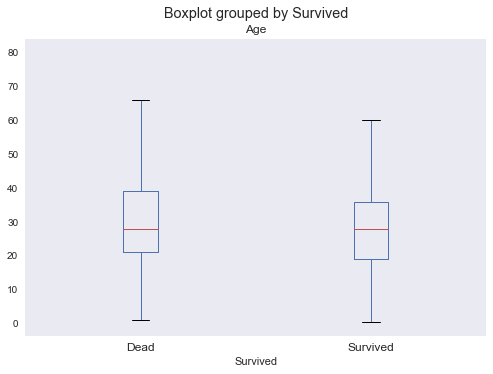

In [16]:
bp = titanic_data.boxplot(column="Age", by="Survived", grid=False)
plt.show()

Observando o boxplot não é possóvel perceber grandes diferenças entre as idades dos passageiros sobreviventes e mortos. Logo, o fator idade, aparentemente, não é fortemente relacionado com a sobrevivência dos passageiros. Para verificar se a política de *"mulheres e **crianças** primeiro"* foi aplicada, classifica-se os passageiros por idade como segue:

Função para categorizar uma idade. Foram considerados com crianças os passageiros com menor do que 11 anos.

In [17]:
def categ_Age(age):
    if age >= 11:
        return "Adult"
    else:
        return "Child"

Função para categorizar um *Dataframe* de idades

In [18]:
def categ_Ages(ages):
    ages = pd.DataFrame(ages)
    return ages.applymap(categ_Age)

Criando nova coluna do *Dataframe* *titanic_data* com as idades cetegorizadas.

In [19]:
titanic_data["Categorized_Age"] = categ_Ages(titanic_data["Age"].dropna())

Distribuição de passageiros sobreviventes e mortos por categoria de idade.

In [20]:
age_surv_tab = pd.crosstab(titanic_data["Survived"],titanic_data["Categorized_Age"])
age_surv_tab

Categorized_Age,Adult,Child
Survived,,
Dead,398,26
Survived,252,38


Gráfico de barras empilhadas: Distribuição por categoria de idade de passageiros sobreviventes e mortos.

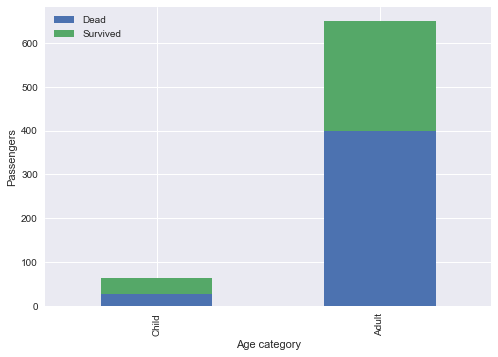

In [21]:
age_child = titanic_data[titanic_data["Categorized_Age"]=="Child"]["Survived"].value_counts()
age_adult = titanic_data[titanic_data["Categorized_Age"]=="Adult"]["Survived"].value_counts()
df = pd.DataFrame([age_child, age_adult])
df.index = ["Child","Adult"]
df.plot(kind='bar',stacked=True)
plt.xlabel("Age category")
plt.ylabel("Passengers")
plt.show()

Taxa de sobrevivência por categoria de idade.

In [22]:
child_surv_rate = round(float(age_child["Survived"]) / float(age_child.sum()), 4)
adult_surv_rate = round(float(age_adult["Survived"]) / float(age_adult.sum()), 4)

age_surv_rate_df = pd.DataFrame([child_surv_rate,adult_surv_rate])
age_surv_rate_df.index = ["Child","Adult"]
age_surv_rate_df.columns = ["Survival Rate"]

age_surv_rate_df

,Survival Rate
Child,0.5938
Adult,0.3877


Avaliando as categorias criança (*Ahild*) e adulto (*Adult*) nota-se uma maior taxa de sobrevivência para as crianças. A política de "*mulheres e **crianças** primeiro*" parece ter sido aplicada para as crianças.

#### 4. Relação entre irmãos / cônjuges (SibSp) e sobrevivência (Survived)

Transformando o número de irmãos/cônjuges (*SibSp*) em variáveis categóricas.

In [23]:
titanic_data["SibSp"] = titanic_data["SibSp"].astype(str)

Descrição ráida da quantidade de irmões/cônjuges por passageiro}s.

In [24]:
titanic_data["SibSp"].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

Nota-se que a maioria dos passageiros não possuem irmãos/cônjuges a bordo.

Distribuição de passageiros sobreviventes e mortos quantidade de irmãos/cônjuges.

In [25]:
sibsp_surv_tab = pd.crosstab(titanic_data["SibSp"],titanic_data["Survived"])
sibsp_surv_tab

Survived,Dead,Survived
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


Gráfico de barras empilhadas: Distribuição por quantidade de irmãos/cônjuges de passageiros sobreviventes e mortos.

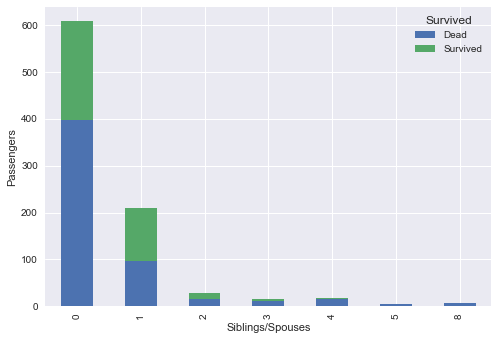

In [26]:
sibsp_surv_tab.plot(kind="bar",stacked=True)
plt.xlabel("Siblings/Spouses")
plt.ylabel("Passengers")
plt.show()

Nota-se que passageiros com 1 irmão/cônjuge apresentam a maior taxa de sobrevivência. Entertanto, existem poucos passageiros com mais de um irmão/cônjuge, o que pode tornar essa variável pouco influente na sobrevivência dos passageiros.

#### 5. Relação entre Pais / Filhos (Parch) e sobrevivência (Survived)

Transformando o número de Pais/Filhos (*Parch*) em variáveis categóricas.

In [27]:
titanic_data["Parch"] = titanic_data["Parch"].astype(str)

Descrição ráida da quantidade de Pais/Filhos por passageiro.

In [28]:
titanic_data["Parch"].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

Nota-se que a maioria dos passageiros não possuem Pais/Filhos a bordo.

Distribuição de passageiros sobreviventes e mortos quantidade de Pais/Filhos.

In [29]:
parch_surv_tab = pd.crosstab(titanic_data["Parch"],titanic_data["Survived"])
parch_surv_tab

Survived,Dead,Survived
Parch,,
0,445,233
1,53,65
2,40,40
3,2,3
4,4,0
5,4,1
6,1,0


Gráfico de barras empilhadas: Distribuição por quantidade de Pais/Filhos de passageiros sobreviventes e mortos.

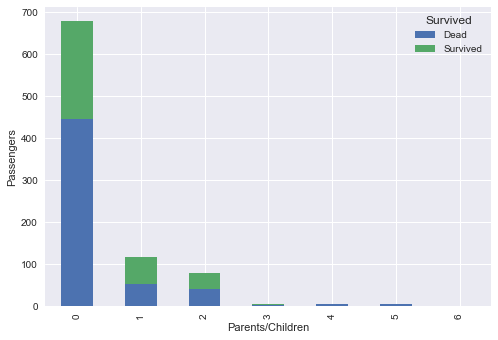

In [30]:
parch_surv_tab.plot(kind="bar",stacked=True)
plt.xlabel("Parents/Children")
plt.ylabel("Passengers")
plt.show()

Nota-se que passageiros com 1 ou 2 pais/filhos a bordo apresentam maior taxa de sobrevivência em comparação com passegeiros sem nenhum pai/filho a bordo. Existem poucos passageiros com 3 ou mais pais/filhos a bordo.

#### 6. Relação entreTarifa de Passageiros (Fare) e sobrevivência (Survived)

Descrição rápida do valor da tarifa por passageiro.

In [31]:
titanic_data["Fare"].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

Nota-se que a maioria dos passagiros pagou entre 7.9 e 31 dólares. Entertamnto, existem valores de tarifas muito altos (max = 512.3).

O boxplot é utilizado para analisar a diferença entre os valores das tarifas pagar por passageiros sobreviventes e mortos.

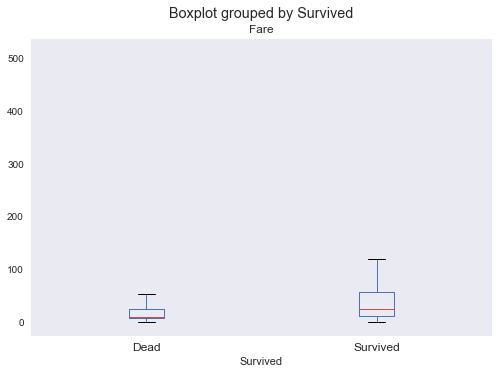

In [32]:
bp_fare = titanic_data.boxplot(column="Fare", by="Survived", grid=False)
plt.show()

Nota-se um menor valor de tarifa paga pelos passageiros que morreram devido a uma distribuição mais curta dos dados. Os dados de tarifa paga pro passageiros que sobreviveram apresnetam uma distribuição mais larga.

#### 7. Relação entre Porto de Embarcação (Embarked) e sobrevivência (Survived)

Distribuição da quantidade de passageiros por porto de embarque.

In [33]:
titanic_data["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

Nota-se que a maioria dos passageiros embarcou no porto de *Southampton* (S), enquanto que apenas 77 passageiros embarcaram no porto de *Queenstown* (Q).

Distribuição de passageiros sobreviventes e mortos por porto de embarque.

In [34]:
embarked_surv_tab = pd.crosstab(titanic_data["Embarked"],titanic_data["Survived"])
embarked_surv_tab

Survived,Dead,Survived
Embarked,,
C,75,93
Q,47,30
S,427,217


Gráfico de barras empilhadas: Distribuição de passageiros sobreviventes ou mortos por porto de embarque.

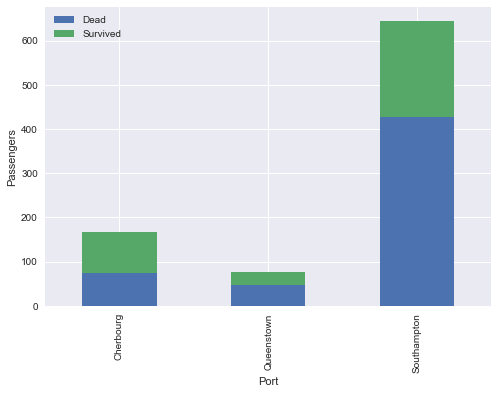

In [35]:
port_C = titanic_data[titanic_data["Embarked"]=="C"]["Survived"].value_counts()
port_Q = titanic_data[titanic_data["Embarked"]=="Q"]["Survived"].value_counts()
port_S = titanic_data[titanic_data["Embarked"]=="S"]["Survived"].value_counts()
df = pd.DataFrame([port_C, port_Q, port_S])
df.index = ["Cherbourg","Queenstown","Southampton"]
df.plot(kind='bar',stacked=True)
plt.xlabel("Port")
plt.ylabel("Passengers")
plt.show()

Taxas de sobrevivência por porto de embarque.

In [36]:
portC_surv_rate = round(float(port_C["Survived"]) / float(port_C.sum()), 4)
portQ_surv_rate = round(float(port_Q["Survived"]) / float(port_Q.sum()), 4)
portS_surv_rate = round(float(port_S["Survived"]) / float(port_S.sum()), 4)

port_surv_rate_df = pd.DataFrame([portC_surv_rate,portQ_surv_rate,portS_surv_rate])
port_surv_rate_df.index = ["Cherbourg","Queenstown","Southampton"]
port_surv_rate_df.columns = ["Survival Rate"]

port_surv_rate_df

,Survival Rate
Cherbourg,0.5536
Queenstown,0.3896
Southampton,0.3370


Nota-se que os passageiros que embarcaram em Southampton apresentaram a menor taxa de sobrevivência, enquanto os passageiros que embarcaram em Cherbourg apresentaram a maior taxa de sobrevivência.

### Conclusões

**1. Passageiros de classe sócio-econômica (*Pclass*) mais elevada tiveram maior taxa de sobrevivência?**

Sim. Passageiros da primeira classe (Pclass = 1) apresentaram a maior taxa de sobrevivência.

**2. Passageiros com prioridade em situações de emergência (mulheres e crianças) tieram maior taxa de sobrevivência?**

Sim. O gênero feninino apresentou maior taxa de sobrevivência, assim como as crianças (passageiros com idade inferior a 11 anos)

**3. Passageiros que embarcaram em diferentes portos apresentaram diferentes taxas de sobrevivência?**

Sim. Passageiros que embarcaram no porto de Cherbourg apresentaram maior taxa de sobrevivência.